# 순서가 있는 데이터 변환하기 1 (Stock price)
### 이동평균선 구하기
- 본 모듈은 다양한 웹 싸이트 (Naver / KRX)에서 주가 정보를 스크래핑(scraping) 
- https://github.com/sharebook-kr/pykrx

In [6]:
!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from pykrx import stock #from pykrx import bond
mydict={}
for ticker in stock.get_market_ticker_list():
  mydict.update({stock.get_market_ticker_name(ticker) : ticker})

No Korean fonts found. Please install the font shown belowbecause Hangul can be broken on the chart.
 - NanumBarunGothic font is required.

    1) font install

    !sudo apt-get install -y fonts-nanum
    !sudo fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    2) runtime restart if colab
    
PYKRX works fine regardless of font installation.


In [8]:
search_key = "삼성"
values = [(key, value) for key, value in mydict.items() if search_key in key]
values

[('삼성SDI', '006400'),
 ('삼성SDI우', '006405'),
 ('삼성공조', '006660'),
 ('삼성물산', '028260'),
 ('삼성물산우B', '02826K'),
 ('삼성바이오로직스', '207940'),
 ('삼성생명', '032830'),
 ('삼성에스디에스', '018260'),
 ('삼성엔지니어링', '028050'),
 ('삼성전기', '009150'),
 ('삼성전기우', '009155'),
 ('삼성전자', '005930'),
 ('삼성전자우', '005935'),
 ('삼성제약', '001360'),
 ('삼성중공업', '010140'),
 ('삼성중공우', '010145'),
 ('삼성증권', '016360'),
 ('삼성출판사', '068290'),
 ('삼성카드', '029780'),
 ('삼성화재', '000810'),
 ('삼성화재우', '000815')]

In [11]:
start_date = '20210101'
end_date = '20220601'
df = stock.get_market_ohlcv(start_date, end_date, "005930")
df

,시가,고가,저가,종가,거래량
날짜,,,,,
2021-01-04,81000,84400,80200,83000,38655276
2021-01-05,81600,83900,81600,83900,35335669
2021-01-06,83300,84500,82100,82200,42089013
2021-01-07,82800,84200,82700,82900,32644642
2021-01-08,83300,90000,83000,88800,59013307
...,...,...,...,...,...
2022-05-25,66700,67100,65900,66400,15150490
2022-05-26,66300,67200,65500,65900,15970890
2022-05-27,66700,66900,66200,66500,11405555


In [5]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
df['5ma'] = df['종가'].rolling(window=5).mean()
df['20ma'] = df['종가'].rolling(window=20).mean()
df['60ma'] = df['종가'].rolling(window=60).mean()
df['120ma'] = df['종가'].rolling(window=120).mean()

In [7]:
df.columns

Index(['시가', '고가', '저가', '종가', '거래량', '5ma', '20ma', '60ma', '120ma'], dtype='object')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


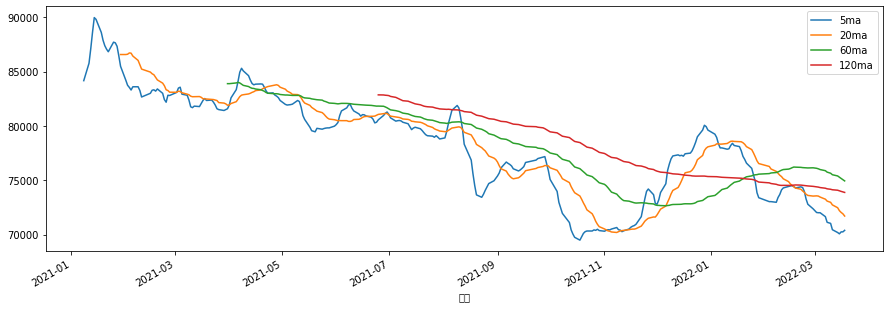

In [8]:
import matplotlib.pyplot as plt
df[['5ma', '20ma', '60ma', '120ma']].plot(figsize=(15, 5))

In [9]:
! pip install pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91 kB 4.0 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=08d599ede4583e0981a9f2de89029963ef6d65cbaecef3b9820b8effa51592d9
  Stored in directory: /root/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39780 sha256=48323a0a6681bd63ed442f046b2d7427978dfd3dde860494e6903d0879673499
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [2]:
! pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# pyfolio
https://m.blog.naver.com/stochastic73/221783539874

https://www.youtube.com/watch?v=8LCXY7YPq-I 

In [3]:
import pyfolio as pf
import FinanceDataReader as fdr

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [4]:
df = fdr.DataReader('US500')
return_series = df['Close'].pct_change().fillna(0)
return_series

Date
1979-12-26    0.000000
1979-12-27    0.001855
1979-12-28   -0.001852
1979-12-31    0.000928
1980-01-01    0.000000
                ...   
2022-05-25    0.009451
2022-05-26    0.019883
2022-05-27    0.024742
2022-05-31   -0.006274
2022-06-01   -0.007483
Name: Close, Length: 10703, dtype: float64

In [30]:
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10703 entries, 0 to 10702
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10703 non-null  datetime64[ns]
 1   Close   10703 non-null  float64       
 2   Open    10703 non-null  float64       
 3   High    10703 non-null  float64       
 4   Low     10703 non-null  float64       
 5   Volume  10703 non-null  float64       
 6   Change  10703 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 585.4 KB


In [31]:
return_series.index

DatetimeIndex(['1979-12-26', '1979-12-27', '1979-12-28', '1979-12-31',
               '1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-07', '1980-01-08',
               ...
               '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-23',
               '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
               '2022-05-31', '2022-06-01'],
              dtype='datetime64[ns]', name='Date', length=10703, freq=None)

### AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
There are some open issues about it in pyfolio's GitHub repository. Apparently, they fixed this issue in their repository, but it's not up-to-date in the Python Package Index (pip).

In [32]:
# Install it again from its github repo
! pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-7nlu1npy
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-7nlu1npy
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75774 sha256=e0cac6827ea92c5e808d8461ed63dd4d6e1ff9fc3dda71d6a1520b04ea6f7edf
  Stored in directory: /tmp/pip-ephem-wheel-cache-5itghmzf/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
Successfully built pyfolio
  Attempting uninstall: pyfolio
    Found existing installation: pyfolio 0.9.2
    Uninstalling pyfolio-0.9.2:
      Successfully uninstalled pyfolio-0.9.2


Start date,1979-12-26
End date,2022-06-01
Total months,509
,Backtest
Annual return,8.945%
Cumulative returns,3704.481%
Annual volatility,17.928%
Sharpe ratio,0.57
Calmar ratio,0.16
Stability,0.93
Max drawdown,-56.775%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,56.78,2007-10-09,2009-03-09,2013-03-28,1428
1,49.15,2000-03-24,2002-10-09,2007-05-30,1874
2,33.92,2020-02-19,2020-03-23,2020-08-18,130
3,33.52,1987-08-25,1987-12-04,1989-07-26,502
4,27.12,1980-11-28,1982-08-12,1982-11-03,504


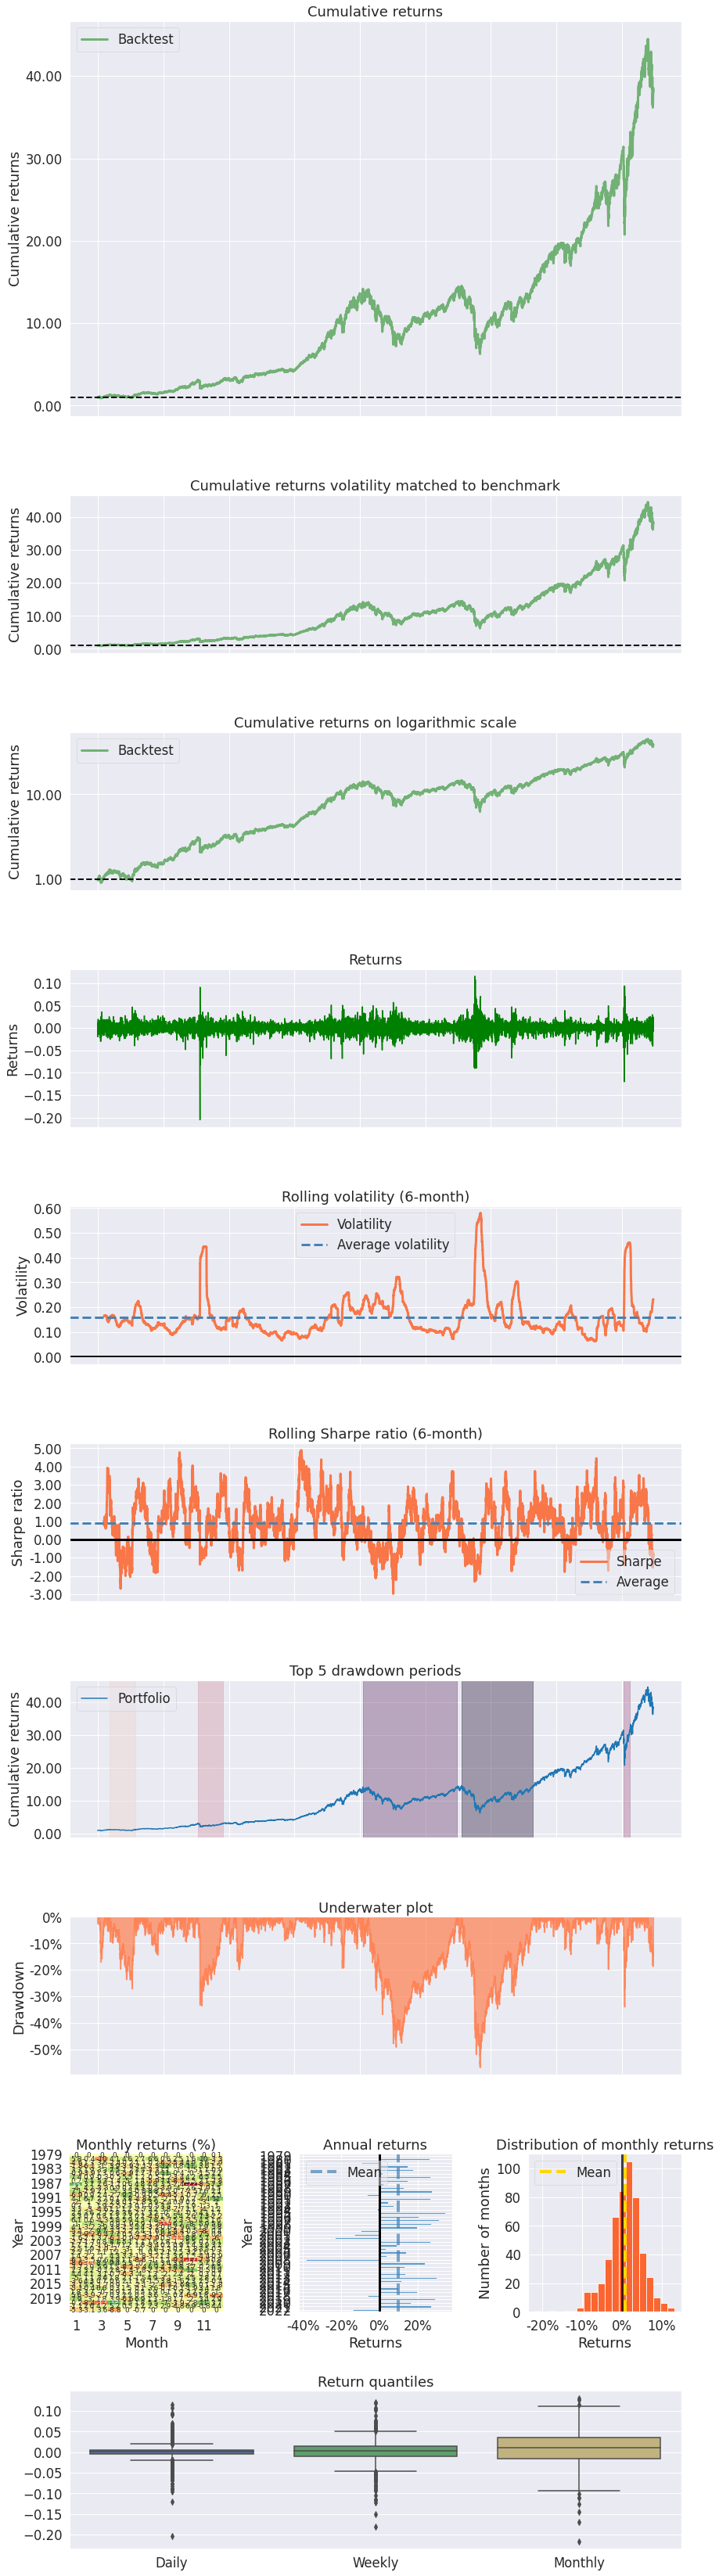

In [5]:
pf.create_returns_tear_sheet(return_series)

Start date,2021-01-04
End date,2022-05-31
Total months,16
,Backtest
Annual return,-12.335%
Cumulative returns,-16.667%
Annual volatility,23.357%
Sharpe ratio,-0.45
Calmar ratio,-0.44
Stability,0.78
Max drawdown,-27.907%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.91,2021-01-12,2022-04-29,NaT,NaN
1,0.60,2021-01-06,2021-01-07,2021-01-08,3
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


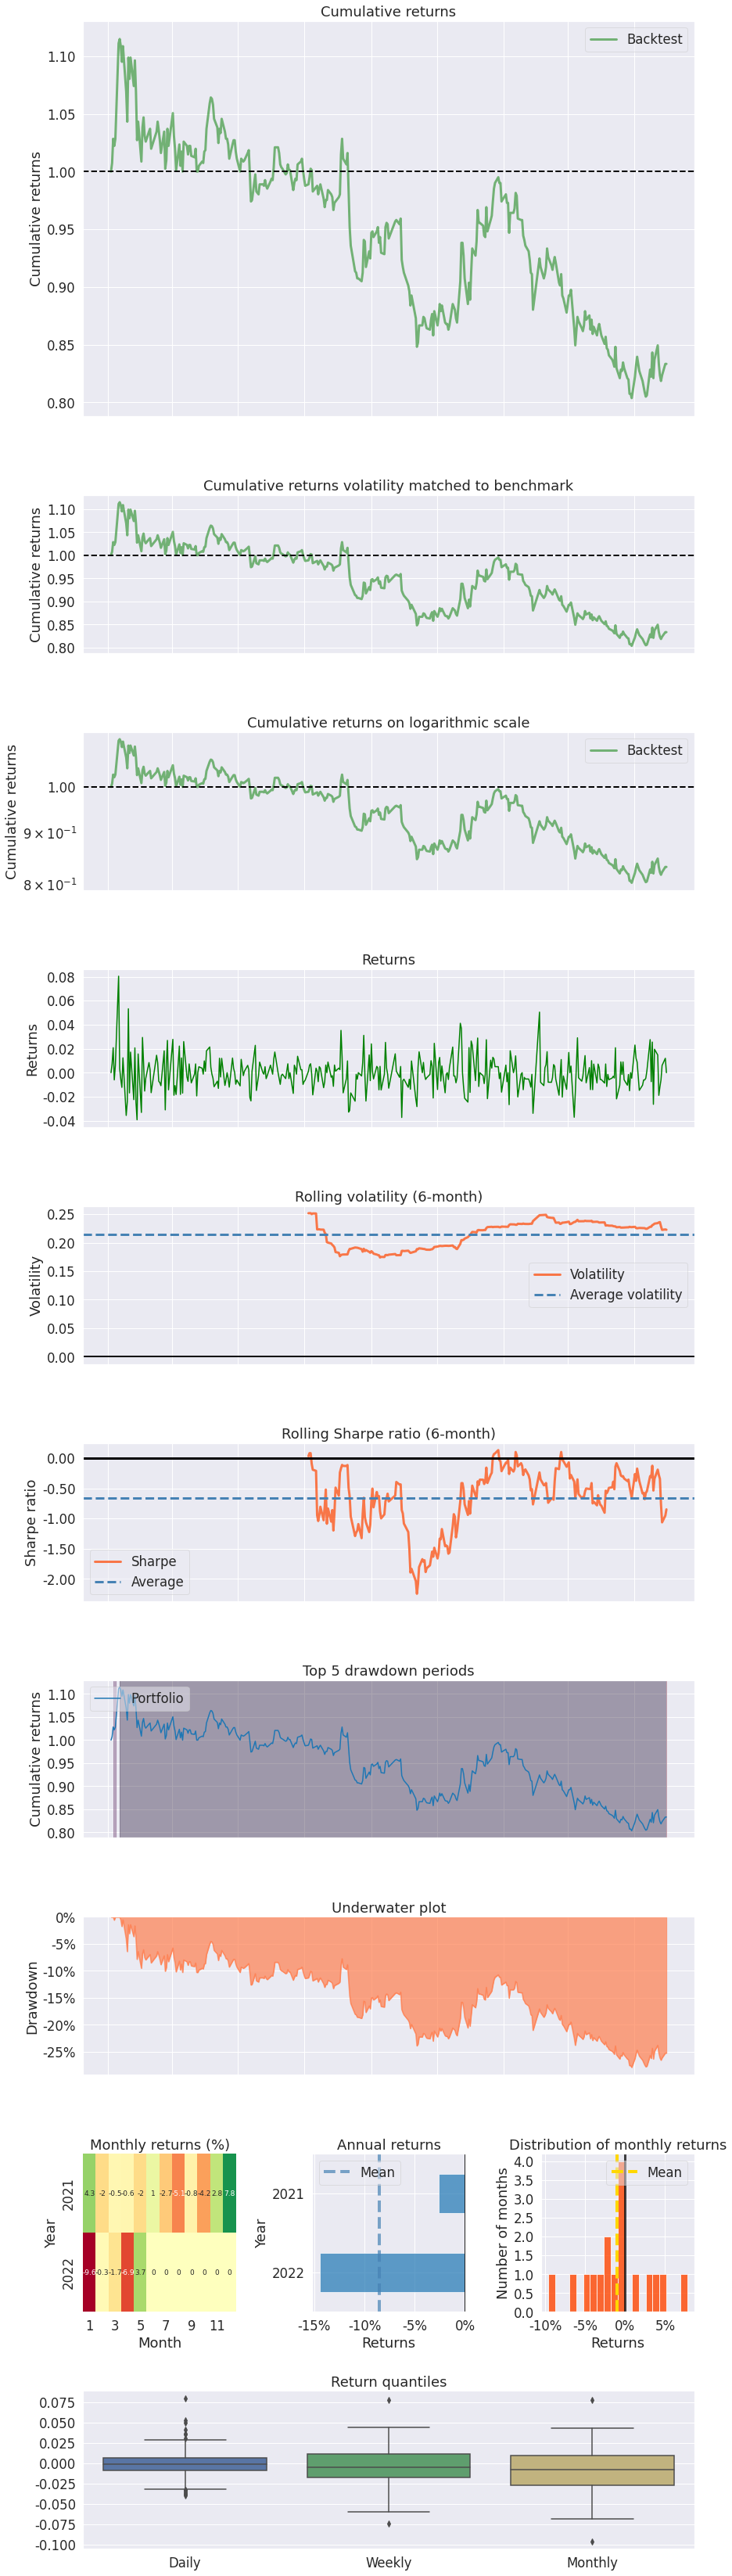

In [12]:
pf.create_returns_tear_sheet(df['시가'].pct_change().fillna(0))

# 순서가 있는 데이터 변환하기 2 (Music)

<img src='https://i.ytimg.com/vi/GTeK8Zn04pA/maxresdefault.jpg' width=600 height=400>

In [ ]:
# transform univariate time series to supervised learning problem
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# define univariate time series
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)
# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)
# show each sample
for i in range(len(X)):
	print(X[i], y[i])

(10,)
(7, 3) (7,)
[1 2 3] 4
[2 3 4] 5
[3 4 5] 6
[4 5 6] 7
[5 6 7] 8
[6 7 8] 9
[7 8 9] 10


In [ ]:
import pandas as pd
code = [1,1,1,1,3,5,5,3,1,5,5,3,5,5,3,1,1,1,5,5,3,1,5,5,5,5,5,3,1,5,5,5,5,5,3,1,5,5,5,6,5,1,5,1,5,3,2,1]
X, y = split_sequence(code, 6)
data = pd.DataFrame(X)
data['target'] = y
data

,0,1,2,3,4,5,target
0,1,1,1,1,3,5,5
1,1,1,1,3,5,5,3
2,1,1,3,5,5,3,1
3,1,3,5,5,3,1,5
4,3,5,5,3,1,5,5
5,5,5,3,1,5,5,3
6,5,3,1,5,5,3,5
7,3,1,5,5,3,5,5
8,1,5,5,3,5,5,3
9,5,5,3,5,5,3,1
